# Tutorial 3: Example Project Lahn

In [1]:
import os
import hydpy
from hydpy import print_vector

In this mybinder repository the example project Lahn is included, which you can also download from https://hydpy-dev.github.io/.
If you reproduce these steps at your local machine, you should download the example project and unzip it to your desired working directory. The Folder 'HydPy-H-Lahn' should be inside your working directory.

The entry point to each project is the central HydPy class. Initialise it by passing the project’s name to it (the name of the project folder):

In [2]:
hp = hydpy.HydPy("HydPy-H-Lahn")

Equally prominent throughout this documentation is the pub module, which allows for the specification of general information. Here, we use it to define the first date, the last date, and the time step size of the considered simulation period in the simplest possible manner:

In [3]:
hydpy.pub.timegrids = "1996-01-01", "1996-01-05", "1d"



Now, there are numerous ways to proceed. We choose the most straightforward one (without deviating from a single default) and call method prepare_everything() of class HydPy, which “prepares everything” so far as to leave the HydPy instance in a simulation-ready state:

In [4]:
hp.prepare_everything()

method HydPy.prepare_network started at 13:36:39
    seconds elapsed: 0.009497100487351418
method Elements.prepare_models started at 13:36:39
    |-----|
    *******
    seconds elapsed: 0.15168510004878044
method Elements.load_conditions started at 13:36:39
    |-----|
    *******
    seconds elapsed: 0.01649310067296028
method Nodes.prepare_allseries started at 13:36:39
    |--|
    ****
    seconds elapsed: 0.002148900181055069
method Elements.prepare_allseries started at 13:36:39
    |-----|
    *******
    seconds elapsed: 0.010342699475586414
method Elements.load_inputseries started at 13:36:39
    |-----|
    *******
    seconds elapsed: 0.06139279995113611


In [5]:
init_conditions = hp.conditions

In [6]:
hp.nodes

Nodes("dill_assl", "lahn_kalk", "lahn_leun", "lahn_marb")

The catchment outlet of the HydPy-H-Lahn example project is named lahn_kalk. The following example demonstrates how to query the discharge values simulated for this outlet:

In [7]:
print_vector(hp.nodes.lahn_kalk.sequences.sim.series)
hp.simulate()
print_vector(hp.nodes.lahn_kalk.sequences.sim.series)

nan, nan, nan, nan
method HydPy.simulate started at 13:36:40
    |--|
    ****
    seconds elapsed: 0.004427699372172356
54.01807423365969, 37.25573158134009, 31.86398265126502,
28.35894864973298


Let's have a look to this mysterious object 'hydpy.pub'. We reveal all its attributes and methods with 'dir', but exclude all the private ones (that is, starting with '_')

In [8]:
[attr for attr in dir(hydpy.pub) if not attr.startswith('_')]

['conditionmanager',
 'config',
 'controlmanager',
 'indexer',
 'networkmanager',
 'options',
 'projectname',
 'scriptfunctions',
 'selections',
 'sequencemanager',
 'timegrids']

We can see four 'manager'-attributes: conditionmanager, controlmanager, networkmanager and sequencemanager. In the previous tutorial, we used the networkmanager to read the network files of the project. So each of the four groups that structure the project has a public manager object. Lets dig deeper into one of them and reveal the attributes of the networkmanager:

In [9]:
[attr for attr in dir(hydpy.pub.networkmanager) if not attr.startswith('_')]

['BASEDIR',
 'DEFAULTDIR',
 'availabledirs',
 'basepath',
 'currentdir',
 'currentpath',
 'delete_files',
 'filenames',
 'filepaths',
 'load_files',
 'projectdir',
 'save_files',
 'zip_currentdir']

So here are the paths to the data stored and also the methods to read and write them. The method 'hp.prepare_everything()' we used before obviously uses these manager functions in the background.

In [10]:
hydpy.pub.networkmanager.currentpath

'C:\\projects\\eurofriend2024\\tutorial\\HydPy-H-Lahn\\network\\default'

Our example project has three network files. These files are turned into selection objects that can be found at hydpy.pub.selections (there is also the selection 'complete' including all nodes and elements):

In [11]:
hydpy.pub.selections

Selections("complete", "headwaters", "nonheadwaters", "streams")

In [12]:
hydpy.pub.selections.complete

Selection("complete",
          nodes=("dill_assl", "lahn_kalk", "lahn_leun", "lahn_marb"),
          elements=("land_dill_assl", "land_lahn_kalk",
                    ...,"stream_lahn_leun_lahn_kalk",
                    "stream_lahn_marb_lahn_leun"))

In [13]:
sel = hydpy.pub.selections.complete.copy("test")

In [14]:
sel.search_upstream(hp.elements.stream_lahn_marb_lahn_leun)

Selection("upstream",
          nodes=("lahn_leun", "lahn_marb"),
          elements=("land_lahn_marb", "stream_lahn_marb_lahn_leun"))

In [15]:
sel

Selection("test",
          nodes=("dill_assl", "lahn_kalk", "lahn_leun", "lahn_marb"),
          elements=("land_dill_assl", "land_lahn_kalk",
                    ...,"stream_lahn_leun_lahn_kalk",
                    "stream_lahn_marb_lahn_leun"))

In [16]:
sel.select_upstream(hp.elements.stream_lahn_marb_lahn_leun)

Selection("test",
          nodes=("lahn_leun", "lahn_marb"),
          elements=("land_lahn_marb", "stream_lahn_marb_lahn_leun"))

In [17]:
hydpy.pub.selections.complete

Selection("complete",
          nodes=("dill_assl", "lahn_kalk", "lahn_leun", "lahn_marb"),
          elements=("land_dill_assl", "land_lahn_kalk",
                    ...,"stream_lahn_leun_lahn_kalk",
                    "stream_lahn_marb_lahn_leun"))

In [18]:
type(hydpy.pub)

hydpy.core.pubtools.Pub

In [19]:
hydpy.pub.timegrids

Timegrids("1996-01-01 00:00:00",
          "1996-01-05 00:00:00",
          "1d")

In [20]:
hydpy.pub.timegrids = "1990-01-01", "2000-12-31", "1d"

In [21]:
hp.prepare_everything()

method HydPy.prepare_network started at 13:36:51
    seconds elapsed: 0.0064024003222584724
method Elements.prepare_models started at 13:36:51
    |-----|
    *******
    seconds elapsed: 0.05817500036209822
method Elements.load_conditions started at 13:36:51
    |-----|
    *******
    seconds elapsed: 0.0165968993678689
method Nodes.prepare_allseries started at 13:36:51
    |--|
    ****
    seconds elapsed: 0.002821299247443676
method Elements.prepare_allseries started at 13:36:51
    |-----|
    *******
    seconds elapsed: 0.03780500032007694
method Elements.load_inputseries started at 13:36:51
    |-----|
    *******
    seconds elapsed: 0.06021120026707649


In [22]:
hp.simulate()

method HydPy.simulate started at 13:37:24
    |---------------------|
    ***********************
    seconds elapsed: 0.8351116999983788


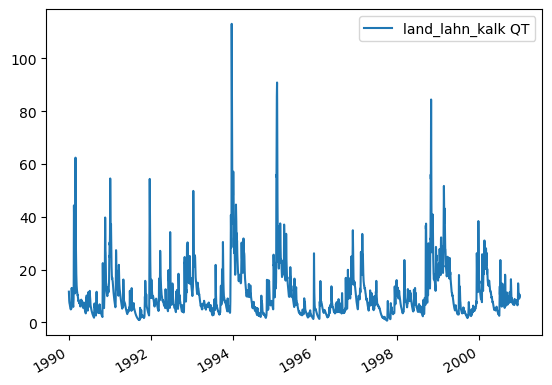

In [39]:
_ = hp.elements.land_lahn_kalk.plot_fluxseries("qt")